# FastText Embedding Creation

In [270]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.tokenize import word_tokenize
from gensim.models import FastText, KeyedVectors
from gensim.models.word2vec import LineSentence
import pandas as pd
import numpy as np

def corpus_analysis(corpus):
    frequency = Counter()
    
    # Leggi il file e aggiorna le frequenze delle parole
    with open(corpus, 'r', encoding='utf-8') as file:
        for line in file:
            tokens = word_tokenize(line)
            frequency.update(tokens)

    # Ottieni i valori delle frequenze e ordina in modo decrescente
    freq_values = list(frequency.values())
    freq_values_sorted = sorted(freq_values, reverse=True)

    # Visualizza la distribuzione delle frequenze delle parole
    plt.figure(figsize=(10, 6))
    plt.loglog(freq_values_sorted)  # Uso di una scala log-log per una migliore visualizzazione
    plt.title('Log-Log plot of words frequency')
    plt.xlabel('Word rank')
    plt.ylabel('Frequency')
    plt.show()

    # Conta le parole con una sola occorrenza
    words_with_one_occurrence = sum(1 for count in frequency.values() if count == 1)

    # Conta le parole con almeno due occorrenze
    words_with_min_count_2 = sum(1 for count in frequency.values() if count >= 2)

    print("Words that appear only once:", words_with_one_occurrence)
    print("Original vocabulary dimention:", len(frequency))
    print("Vocabulary dimention if we set min_count=2:", words_with_min_count_2)
    

In [271]:
def fasttext_training(corpus, min_count = 1):

    lee_data = LineSentence(corpus)
    # Il numero di parole si riduce drasticamente se cambiamo mincount anche di poco (da 1 a 2, da 30mil a a 14mila token)
    # Lasciamo 1 perchè vogliamo vedere come si comporta LSTM se ha un emebdding per parola (senza oov words), anche se la qualità degli embedding è inferiore
    # Window = 5, considerazioni riguardo la lunghezza media dei tweet
    # sg = 1 usiamo skipgram 
    # epochs = 5 default
    # min_n = 1 perchè magari ci sono anche parole molto corte, di due caratteri 
    model = FastText(min_count = min_count, vector_size = 100, window = 5, sg = 1, epochs = 5, min_n = 1)

    # build the vocabulary
    model.build_vocab(lee_data)
    len_vocab = len(model.wv)
    tot_sentences = model.corpus_count

    # train the model
    model.train(lee_data, total_examples = tot_sentences, total_words = len_vocab, epochs = model.epochs)

    wv = model.wv

    return wv 
    

In [272]:
def model_evaluation(model):
    print("Is night in the vocabulary?")
    print('night' in model.key_to_index)
    print()

    print("Is nights in the vocabulary?")
    print('nights' in model.key_to_index)
    print()

    print("Similarity between nigth and nights:")
    print(model.similarity("night", "nights"))
    print()

    print("Is dog in the vocabulary?")
    print('dog' in model.key_to_index)
    print()

    print("Most similar words to dog:")
    print(model.most_similar("dog"))
    print()


    print("Is brothers in the vocabulary?")
    print('brothers' in model.key_to_index)
    print()

    print("Most similar words to brothers:")
    print(model.most_similar("brothers"))
    print()

    print("Similarity between sushi shop and japanese restaurant:")
    print(model.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant']))
    print()


In [273]:
def qw_acc(model):
    fasttext_wAp_analogy = model.evaluate_word_analogies('questions-words.txt')

    # Extracting the accuracy and category results
    total_accuracy = fasttext_wAp_analogy[0]
    category_results = fasttext_wAp_analogy[1]

    # Processing the data
    sections = []
    accuracies = []
    total_correct = 0
    total_incorrect = 0

    for entry in category_results:
        section = entry['section']
        correct = len(entry['correct'])
        incorrect = len(entry['incorrect'])
        total = correct + incorrect
        accuracy = correct / total if total > 0 else 0
        sections.append(section)
        accuracies.append(accuracy)
        total_correct += correct
        total_incorrect += incorrect

    # Total accuracy
    total_accuracy = total_correct / (total_correct + total_incorrect)

    # Creating DataFrame
    df = pd.DataFrame({
        'Section': sections,
        'Accuracy': accuracies
    })

    print("Accuracy per Section:")
    print(df)

In [274]:
# Txt file creation for both dataset (already in the folder, no need to run it)
#df = pd.read_csv('../../../data/New dataset/LSTM/no_preprocessing/train_tweets_LSTM_no_new.csv')
#df['tweet_text'].to_csv('text_data_no.txt', index=False, header=False)

#df = pd.read_csv('../../../data/New dataset/LSTM/preprocessing/train_tweets_LSTM_pre_new.csv')
#df['tweet_text'].to_csv('text_data_pre.txt', index=False, header=False)

## Corpus Analysis

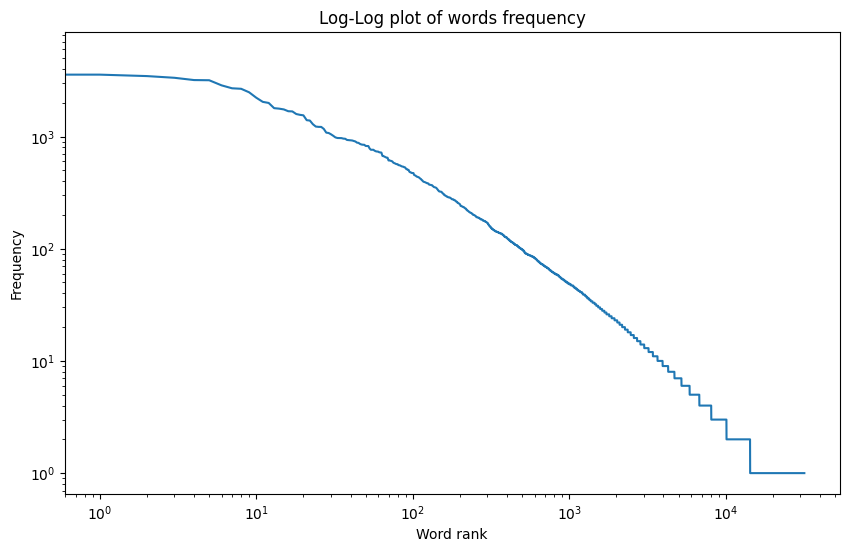

Words that appear only once: 17487
Original vocabulary dimention: 31782
Vocabulary dimention if we set min_count=2: 14295


In [275]:
corpus_analysis('text_data_no.txt')

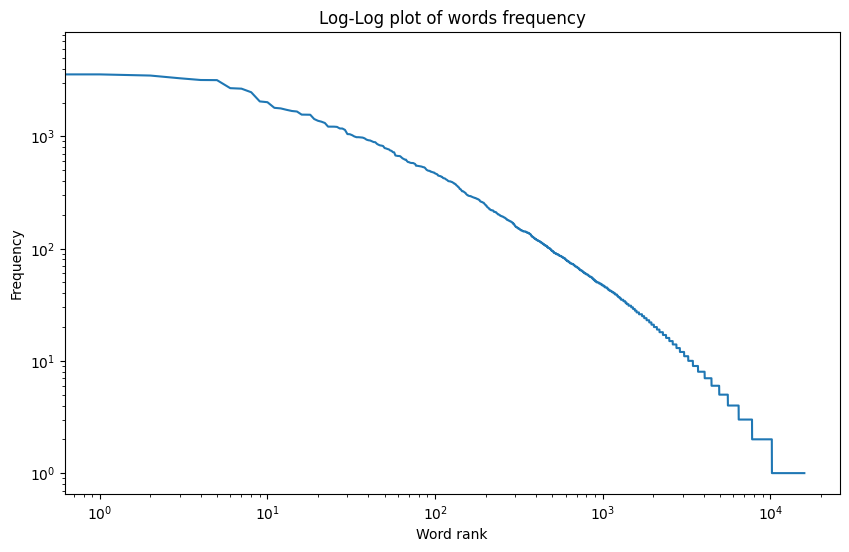

Words that appear only once: 5747
Original vocabulary dimention: 15951
Vocabulary dimention if we set min_count=2: 10204


In [276]:
corpus_analysis('text_data_pre.txt')

## Model Training

In [277]:
model1 = fasttext_training('text_data_no.txt')

In [278]:
model2 = fasttext_training('text_data_pre.txt')

## Model Evaluation

### General similarity tests 

In [279]:
model_evaluation(model1)

Is night in the vocabulary?
True

Is nights in the vocabulary?
True

Similarity between nigth and nights:
0.8708723

Is dog in the vocabulary?
True

Most similar words to dog:
[('dogg', 0.9703572392463684), ('doggo', 0.9393236637115479), ('og', 0.9135992527008057), ('doug', 0.9081555008888245), ('ofg', 0.9018085598945618), ('dogs', 0.8946580290794373), ('doggy', 0.8918026089668274), ('droog', 0.886388897895813), ('frog', 0.8796858787536621), ('dox', 0.8794143199920654)]

Is brothers in the vocabulary?
True

Most similar words to brothers:
[('brotherssisters', 0.9849886298179626), ('bothers', 0.9764004945755005), ('brotherssister', 0.9741512537002563), ('rioterslooters', 0.9718755483627319), ('looters', 0.9649954438209534), ('brotherhoods', 0.9615164399147034), ('rioters', 0.960638165473938), ('inothers', 0.9602214694023132), ('fighters', 0.9598827362060547), ('northerners', 0.959702730178833)]

Similarity between sushi shop and japanese restaurant:
0.8607003



In [280]:
model_evaluation(model2)

Is night in the vocabulary?
True

Is nights in the vocabulary?
True

Similarity between nigth and nights:
0.96781003

Is dog in the vocabulary?
True

Most similar words to dog:
[('dogs', 0.9360858798027039), ('doggo', 0.9320464730262756), ('fog', 0.9076128005981445), ('doggy', 0.8958892822265625), ('doggie', 0.8856238126754761), ('doge', 0.8803799152374268), ('dg', 0.8695666193962097), ('cog', 0.8633638024330139), ('frog', 0.8627618551254272), ('dogwood', 0.8539823889732361)]

Is brothers in the vocabulary?
False

Most similar words to brothers:
[('brother', 0.9660890102386475), ('brotherhood', 0.9511023163795471), ('broth', 0.9437435269355774), ('motherhood', 0.943413257598877), ('bravery', 0.9350374341011047), ('publisher', 0.9343945384025574), ('unbothered', 0.9333058595657349), ('sherif', 0.9332993626594543), ('otherwise', 0.9316489100456238), ('sherry', 0.9311670660972595)]

Similarity between sushi shop and japanese restaurant:
0.807976



### Question-words test

In [281]:
qw_acc(model1)

Accuracy per Section:
                        Section  Accuracy
0      capital-common-countries  0.000000
1                 capital-world  0.000000
2                      currency  0.000000
3                 city-in-state  0.000000
4                        family  0.049451
5     gram1-adjective-to-adverb  0.675725
6                gram2-opposite  0.616667
7             gram3-comparative  0.550538
8             gram4-superlative  0.450000
9      gram5-present-participle  0.491667
10  gram6-nationality-adjective  0.104452
11             gram7-past-tense  0.089247
12                 gram8-plural  0.661290
13           gram9-plural-verbs  0.719298
14               Total accuracy  0.417775


In [282]:
qw_acc(model2)

Accuracy per Section:
                        Section  Accuracy
0      capital-common-countries  0.011111
1                 capital-world  0.000000
2                      currency  0.000000
3                 city-in-state  0.003115
4                        family  0.049451
5     gram1-adjective-to-adverb  0.761538
6                gram2-opposite  0.673810
7             gram3-comparative  0.500000
8             gram4-superlative  0.291667
9      gram5-present-participle  0.645238
10  gram6-nationality-adjective  0.203767
11             gram7-past-tense  0.037549
12                 gram8-plural  0.690476
13           gram9-plural-verbs  0.666667
14               Total accuracy  0.376815


Saving the models

In [283]:
# Salva i vettori FastText
model1.save("fasttext_model_no.bin")
model2.save("fasttext_model_pre.bin")

Create embedding matrix

In [284]:

def create_embedding_matrix(wv_path, bool = 1):
    try:
        wv = KeyedVectors.load(wv_path)
        print("VWords vectors successfully uploaded")
    except FileNotFoundError:
        print(f"Error: wrong path")
        exit()

    vocab = list(wv.key_to_index.keys())

    vector_size = wv.vector_size

    embedding_matrix = np.zeros((len(vocab) + 1, vector_size))

    for i, word in enumerate(vocab):
        embedding_matrix[i] = wv[word]

    if bool == 1:
        embedding_matrix_path = "fasttext_embeddingmatrix_pre.npy"
    else:
        embedding_matrix_path = "fasttext_embeddingmatrix_no.npy"
    
    np.save(embedding_matrix_path, embedding_matrix)

In [285]:
create_embedding_matrix('fasttext_model_no.bin', 0)
create_embedding_matrix('fasttext_model_pre.bin', 1)

VWords vectors successfully uploaded
VWords vectors successfully uploaded
